<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/plot_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# learn to plot MACD with py
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt

#data
dsrc='yahoo'
stox='TSLA'
sdate='2019-06-30'

#calculation
STs=12 #short term span
LTs=26 #long term span
SLs=9 #signal line span

#layout
fs=28; #font size
fsx=36; fsy=9 #figure size, x=width and y=heigth
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.style.use('fivethirtyeight')

In [55]:
from google.colab import files
up1 = files.upload()
#up2 = files.upload()
#up3 = files.upload()
#up4 = files.upload()
#up5 = files.upload()

In [56]:
# data frame
df = pd.read_csv('EURN.2016.csv')
#
###-----------> df['date']=df['time'].dt.date
df = df.set_index(pd.DatetimeIndex(df['time'].values))
df.rename(columns={'EURONAV':'eurn', 'EURONAV( volume )':'vol.'}, inplace=True)
#print("\n df test")
#df.head(5)
#df.tail(10)
# ALL: 3976 rows; >2016: 1147 rows
df

,time,eurn,vol.
2015-12-31 01:00:00,2015-12-31 01:00,12.680,160006
2016-01-04 01:00:00,2016-01-04 01:00,12.440,371028
2016-01-05 01:00:00,2016-01-05 01:00,12.080,440638
2016-01-06 01:00:00,2016-01-06 01:00,11.865,273827
2016-01-07 01:00:00,2016-01-07 01:00,11.525,658114
...,...,...,...
2020-06-22 02:00:00,2020-06-22 02:00,7.480,1130204
2020-06-23 02:00:00,2020-06-23 02:00,7.510,1440519
2020-06-24 02:00:00,2020-06-24 02:00,7.255,1340558
2020-06-25 02:00:00,2020-06-25 02:00,7.210,1256838


In [57]:
# ct = pd.crosstab(df.xxx, df.yyy, normalize='index')*100
# ct = ct.drop(columns=['vol.'])
#ct = --->df['index'],<--- df['time'], df['€URN']
# datetime = ct['time'].tolist()
ct = pdr.DataReader(stox, data_source=dsrc,start=sdate)
ct.rename(columns={'High':'h', 'Low':'l', 'Open':'o', 'Close':'c', 
                   'Volume':'vol', 'Adj Close':'ac'}, inplace=True)
ct = ct.drop('o', 1)
ct[-5:]

,h,l,c,vol,ac
Date,,,,,
2020-07-22,1626.420044,1562.000000,1592.329956,14161100,1592.329956
2020-07-23,1689.000000,1480.770020,1513.069946,24328500,1513.069946
2020-07-24,1465.000000,1366.540039,1417.000000,19396600,1417.000000
2020-07-27,1547.939941,1413.000000,1539.599976,15988400,1539.599976
2020-07-28,1564.459961,1474.420044,1476.489990,15808700,1476.489990


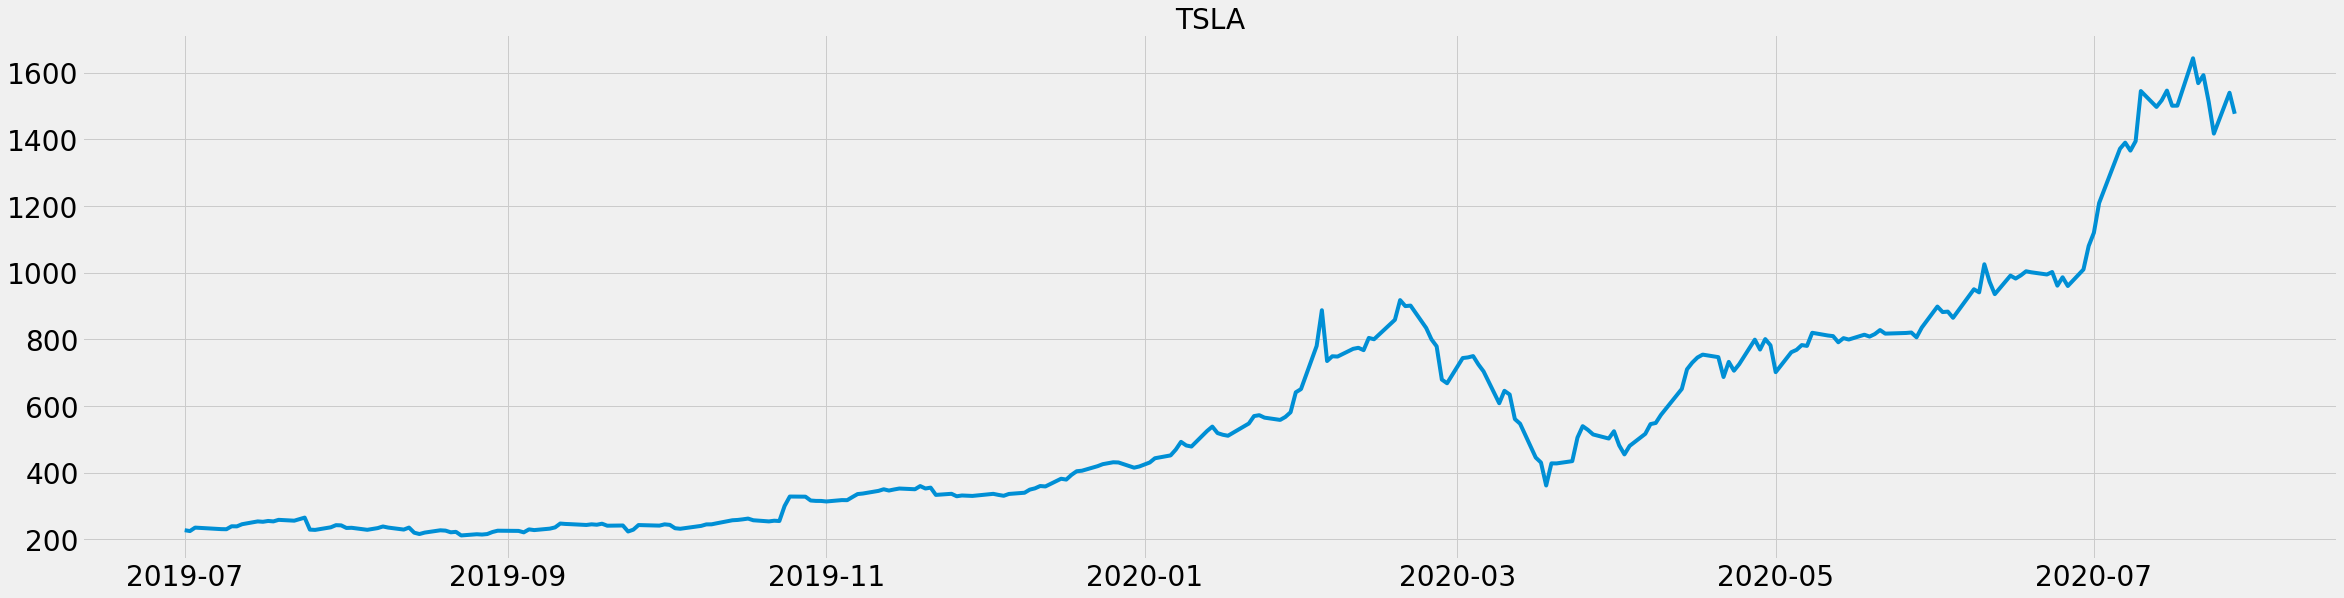

In [58]:
#fig, ax = plt.subplots(figsize=(1,1))
#ax1 = sns.lineplot(x=ct['index'].tolist(), y=ct['€URN'].tolist())
plt.figure(figsize=(fsx, fsy))
plt.plot(ct['ac'])
plt.title(stox, fontsize=fs) #plt.ylabel($€£); #plt.xlabel('date')
plt.show()

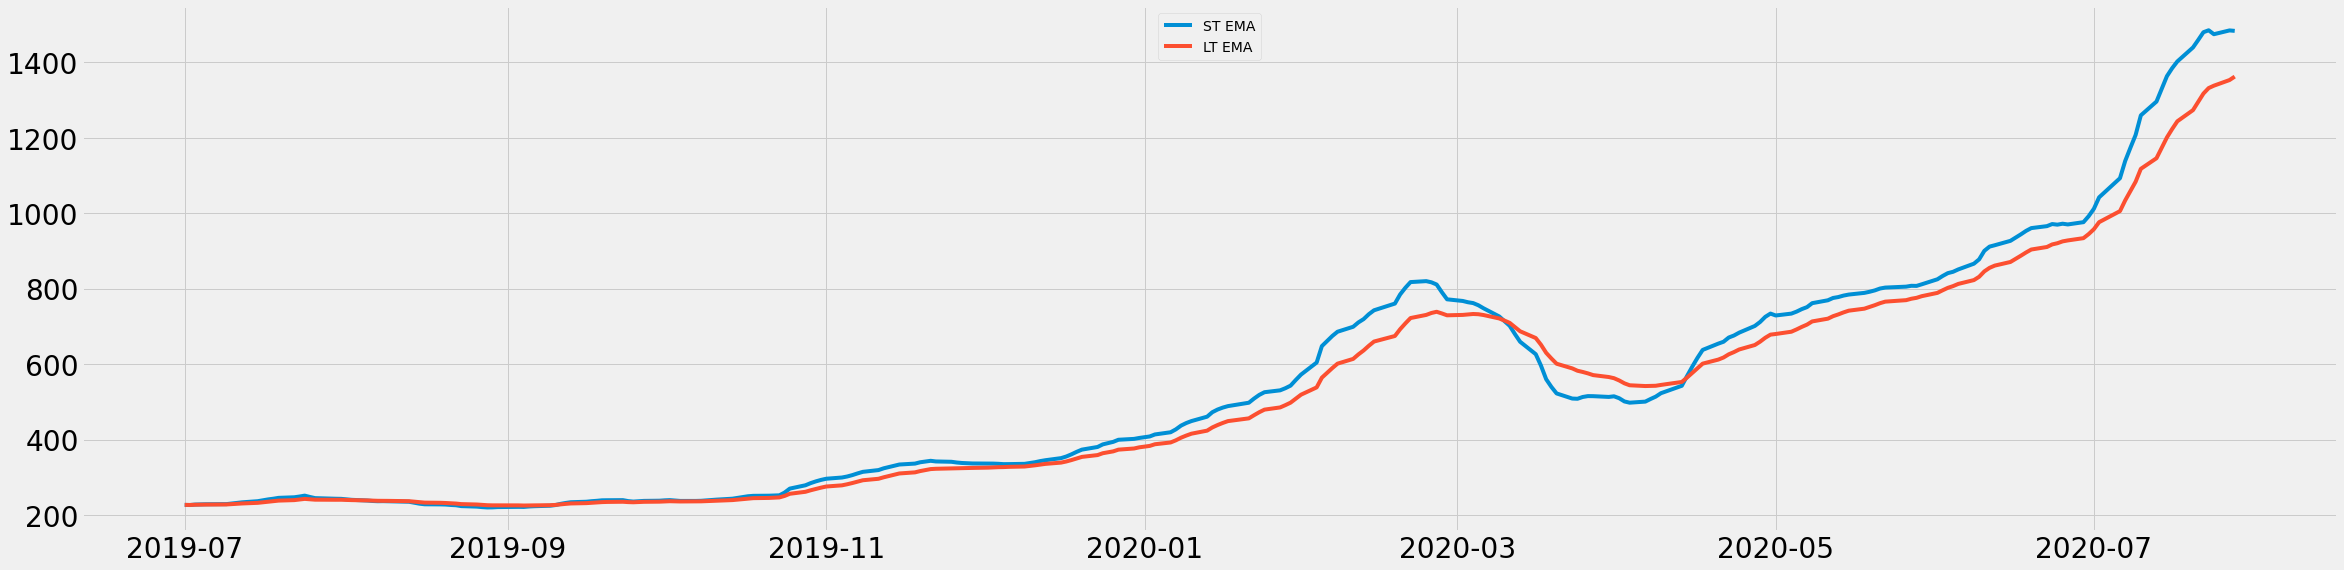

In [59]:
# Exponential Moving Average, EMAs
SEMA = ct.ac.ewm(span=STs, adjust=False).mean()
LEMA = ct.ac.ewm(span=LTs, adjust=False).mean()
plt.figure(figsize=(fsx, fsy))
plt.plot(ct.index, SEMA, label='ST EMA')
plt.plot(ct.index, LEMA, label='LT EMA')
plt.legend(loc='upper center')
plt.show()

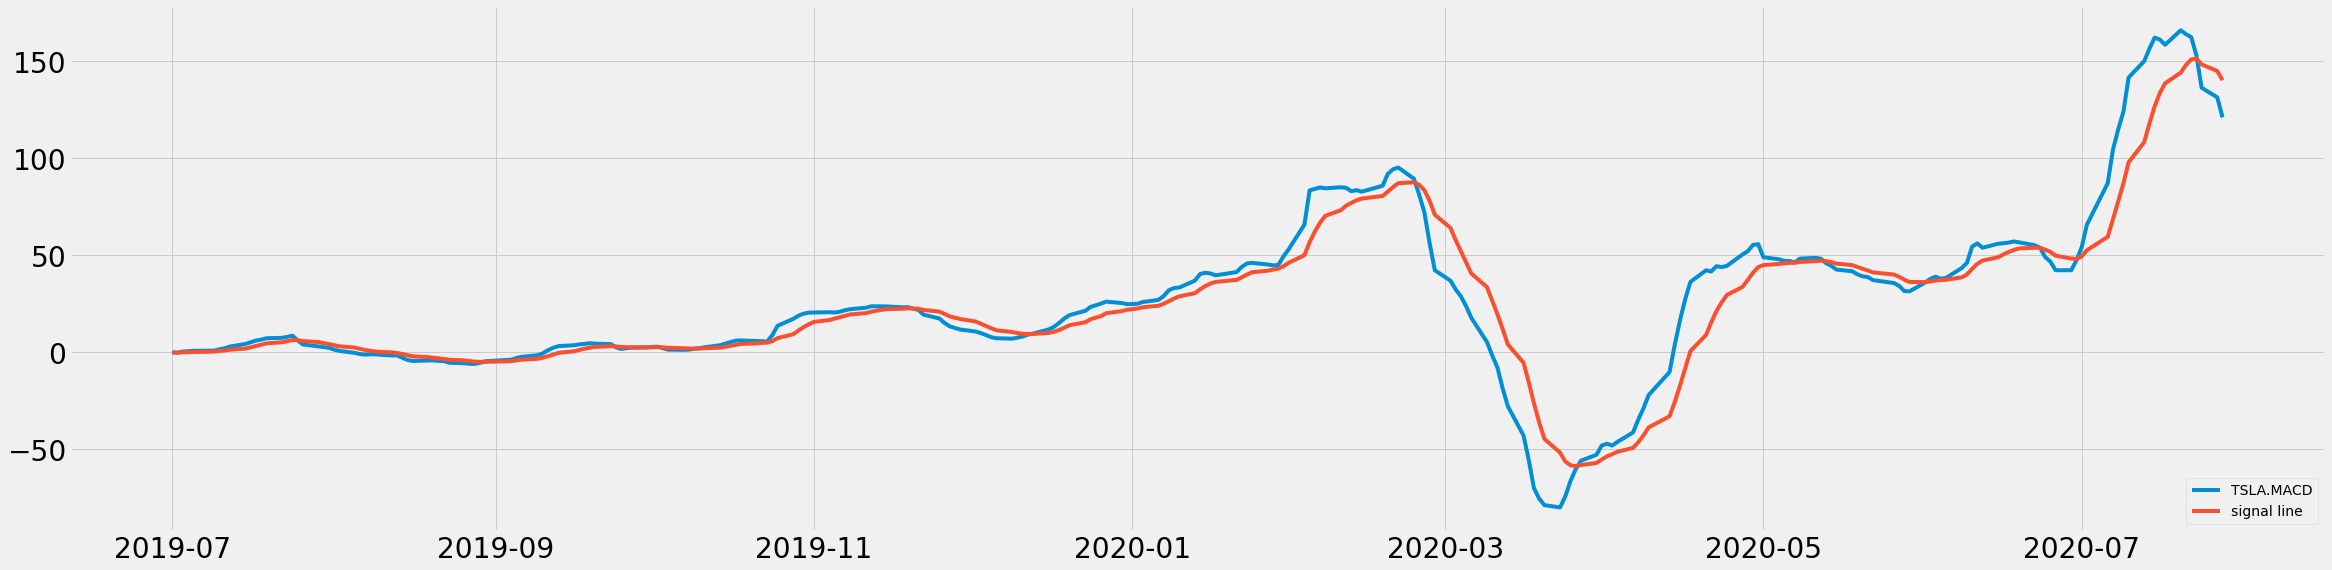

In [60]:
MACD = SEMA - LEMA
SL = MACD.ewm(span=SLs, adjust=False).mean()
plt.figure(figsize=(fsx,fsy))
plt.plot(ct.index, MACD, label=stox+'.MACD')
#ax1 = sns.lineplot(x=df.index, y=SL)
plt.plot(ct.index, SL, label='signal line')
plt.legend(loc='lower right')
plt.show()
ct['MACD']=MACD; ct['SL']=SL; 
#df

In [61]:
# determine whether Buy Or Sell
def bos(line):
  Buy=[]
  Sell=[]
  flag=-1
  for i in range(0, len(SL)):
    if line['MACD'][i] > line['SL'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(line['ac'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif line['MACD'][i] < line['SL'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(line['ac'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

bosc=bos(ct)
ct['Bprice'] = bosc[0]
ct['Sprice'] = bosc[1]
#df

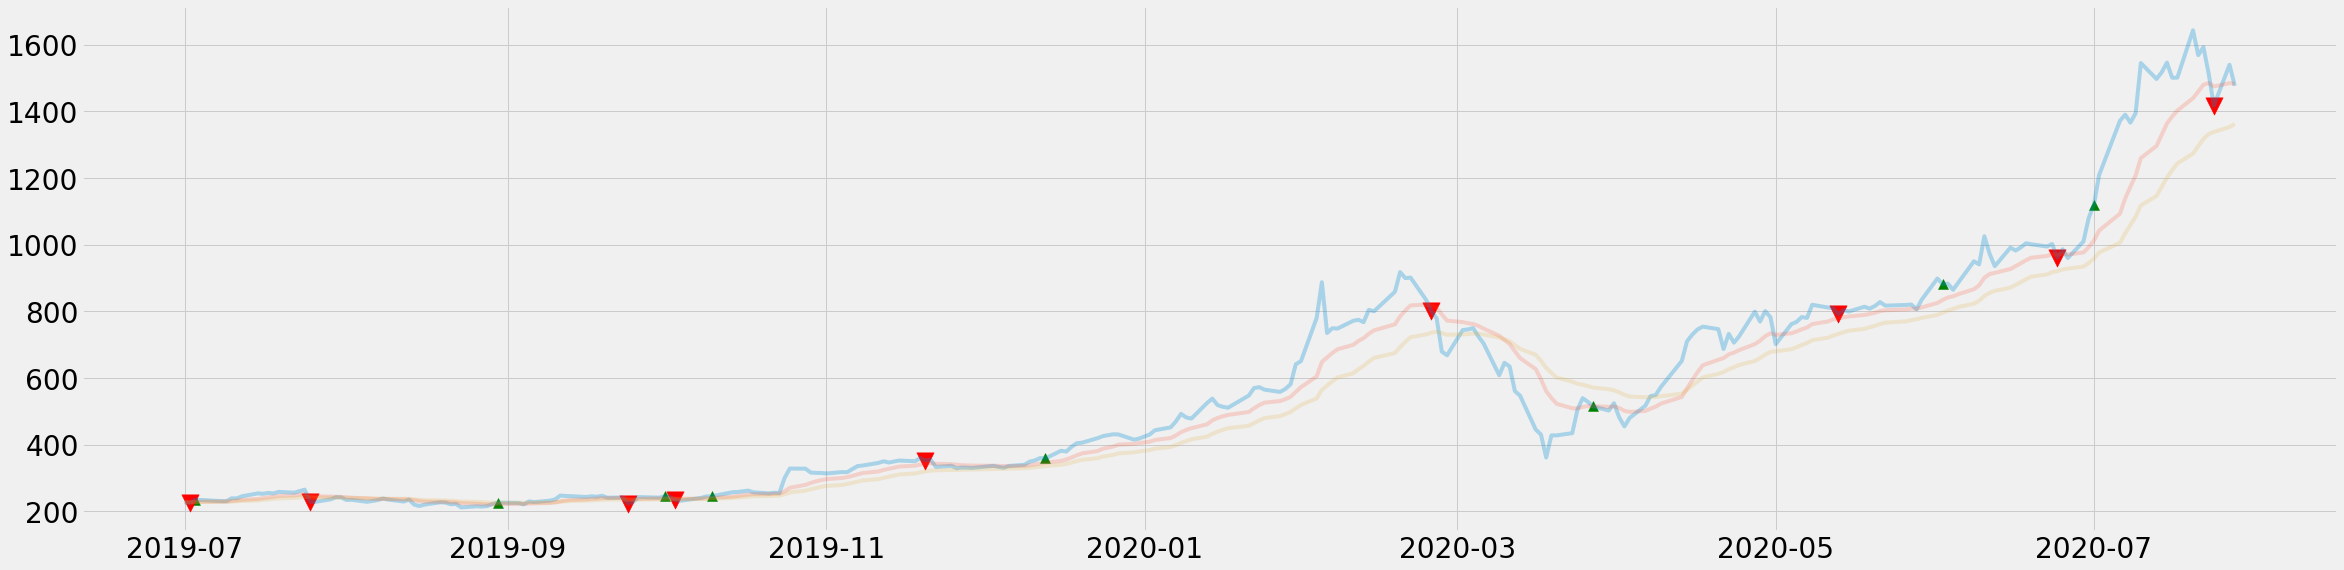

In [65]:
plt.figure(figsize=(fsx, fsy))
plt.scatter(ct.index, ct['Bprice'], color='green', label='B', marker='^', s=99)
plt.scatter(ct.index, ct['Sprice'], color='red', label='S', marker='v', s=300)
plt.plot(ct['ac'], label='adj', alpha=0.3)
plt.plot(SEMA, label='SEMA', alpha=0.2)
plt.plot(LEMA, label='LEMA', alpha=0.2)
plt.show()
